In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
train_normalize = pd.read_csv('D:\Code\py_code\Artificial-Neural-Network\Single-Layer-Perceptron\data/train_data_normalized.csv', sep=';')
x_train_normalize = train_normalize.iloc[:, 1:-1].values
y_train_normalize = train_normalize.iloc[:, -1].values
train_normalize.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1.0,1.0,0.271174,0.2,0.0,0.014151,1.0,0
1,2,0.0,0.0,0.472229,0.2,0.0,0.139136,0.0,1
2,3,1.0,0.0,0.321438,0.0,0.0,0.015469,1.0,1
3,4,0.0,0.0,0.434531,0.2,0.0,0.103644,1.0,1
4,5,1.0,1.0,0.434531,0.0,0.0,0.015713,1.0,0


In [4]:
test_normalize = pd.read_csv('D:\Code\py_code\Artificial-Neural-Network\Single-Layer-Perceptron\data/test_data_normalized.csv', sep=';')
x_test_normalize = test_normalize.iloc[:, 1:-1].values
y_test_normalize = test_normalize.iloc[:, -1].values
test_normalize.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.5,0
1,893,1.0,0.0,0.617566,0.125,0.000000,0.013663,1.0,1
2,894,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.5,0
3,895,1.0,1.0,0.353818,0.000,0.000000,0.016908,1.0,0
4,896,1.0,0.0,0.287881,0.125,0.166667,0.023984,1.0,1


In [5]:
tf.random.set_seed(42)

# Define the model
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[len(x_train_normalize[0])], activation='sigmoid', kernel_initializer='random_uniform')
])
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
history = model.fit(x_train_normalize, y_train_normalize, epochs=1000)

Epoch 1/1000


23/23 [==============================] - 1s 2ms/step - loss: 0.2489 - accuracy: 0.5688
Epoch 2/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.6096
Epoch 3/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.5955
Epoch 4/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2384 - accuracy: 0.5955
Epoch 5/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.5955
Epoch 6/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.5955
Epoch 7/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.5955
Epoch 8/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.5955
Epoch 9/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.5955
Epoch 10/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.59

In [12]:
model.evaluate(x_train_normalize, y_train_normalize)

23/23 [==============================] - 0s 2ms/step - loss: 0.1507 - accuracy: 0.7823


[0.15068966150283813, 0.7823033928871155]

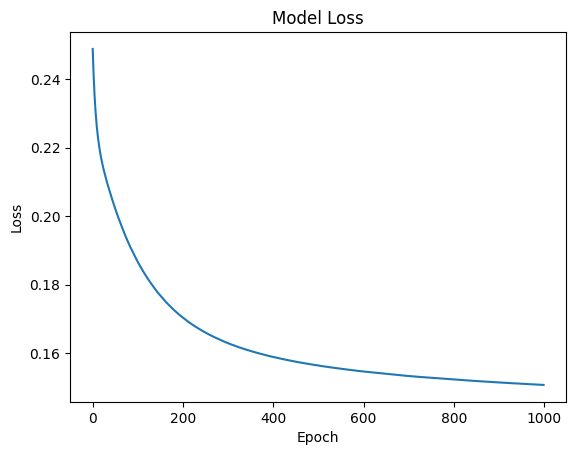

In [13]:
# Plot the loss graph
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

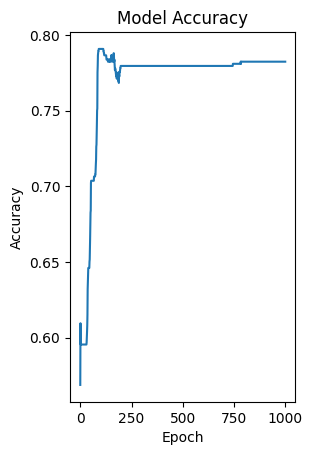

In [8]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()